**GitHub: https://github.com/Estiven2004/RiskAlert-Diabetes.git**

**Integrantes del proyecto:**

Manuel Gutiérrez Tangarife

Estiven Ospina Jaramillo

Juan Pablo Ramírez Betancur


# RiskAlert: Diabets

La diabetes es una enfermedad silenciosa que afecta a millones de personas en el mundo. Lo más preocupante es que muchas no saben que la padecen, lo que retrasa el diagnóstico y aumenta el riesgo de complicaciones graves e incluso la muerte.

La detección temprana es clave, pero sigue siendo un reto en los sistemas de salud actuales. Por eso, este proyecto propone el uso de modelos de Machine Learning como herramienta predictiva, que permita identificar a personas en riesgo a partir de datos básicos, facilitando así la prevención y una atención médica oportuna.

**Problemática**
A pesar del avance en el acceso a la información y la tecnología médica, la diabetes sigue siendo diagnosticada tardíamente en una gran parte de la población. Muchas personas conviven con la enfermedad sin saberlo, lo que impide un tratamiento temprano y aumenta el riesgo de complicaciones graves como insuficiencia renal, problemas cardíacos, ceguera e incluso la muerte.

Esta situación se agrava por la falta de herramientas prácticas y automatizadas que permitan identificar a tiempo a quienes están en riesgo. Por ello, es necesario desarrollar soluciones que apoyen la detección temprana de la diabetes, especialmente en contextos donde el acceso al diagnóstico médico es limitado.

**Fuente de datos** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
from matplotlib import pyplot as plt
import os
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import math
from scipy import stats

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

#Preparación de datos y configuración de pipeline para Machine Learning con scikit-learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#for regression
from sklearn.metrics import r2_score

#For .pkl
import joblib

In [2]:
diabetes = pd.read_csv("/content/data/diabetes_012_health_indicators_BRFSS2015.csv.zip")

In [3]:
diabetes.shape

(253680, 22)

In [4]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#  Análisis exploratorio de datos que esta compuesto por 7 pasos.
**1. Pregunta a analizar que se tratara de responder a partir de la base de datos:**
**¿Que personas tiene mayor probabilidad(posibilidad) de padecer diabetes, prediabetes o nada, a partir de los datos?**

**2. Tener una visualizacion de como se comportan los**

In [5]:
display(diabetes) #vista previa de los datos
display(diabetes.info()) #info general de cada una de las variables
display(diabetes.shape) #tamaño de la base de datos

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

None

(253680, 22)

<Axes: >

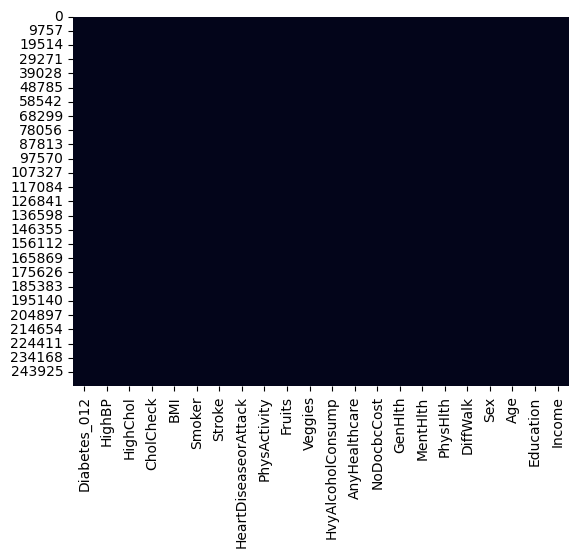

In [6]:
sns.heatmap(diabetes.isnull(), cbar=False) #para ver si hay Na´s

No hay rastros de Na´s

# **3. Definición de tipos de datos**

In [7]:
diabetes.columns #nombres de las columnas

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [8]:
#Cambiamos el nombre de las variables
diabetes = diabetes.rename(columns={
    "Diabetes_012":"tipo", #no diabetes, prediabes, diabetes
    "HighBP":"presion_alterial_alta", # 0 no alta, 1 alta
    "HighChol":"colesterol_alto", #0 no colesterol alto, 1 colesterol alto
    'CholCheck' : "colesterol_chequeado", #chequeo su colesterol en 5 años, 0 no y 1 si
    'BMI':"imc", #indice de masa corporal
    'Smoker': "fuma", #ha fumado almenos 5 paquetes de cigarrillos en su vida, 0 no y 1 si
    'Stroke':"accidente_cerebrovascular", #ha tenido un accidente cerebrovascular, 0 no y 1 si
    'HeartDiseaseorAttack':"enfermedad_cardiaca",#ha sufrido una enfermedad cardiaca, 0 no y 1 si
    'PhysActivity':"hace_ejercicio",#realizo ejercico los ultimos 30 días, 0 no y 1 si
    'Fruits':"come_fruta",#si come fruta almenos 1 vez al día, 0 no y 1 si
    'Veggies':"come_vegetales", #si come vegetales almenos 1 vez al día,0 no y 1 si
    'HvyAlcoholConsump':"toma_alcohol",# hombres, 1 toma más de 14 veces a la semana, 0 no. Mujer, 1 si toma
    #más de 7 veces a al semana, 0 no.
    'GenHlth':"percepcion_salud" ,#1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
    'MentHlth' : "percepcion_mental",#cantidad de días 1-30 que tuvo problemas con sus emociones
    'PhysHlth':"percepcion_fisica",#cantidad de días 1-30 que tuvo problemas con su salud física
    'DiffWalk': "dificultad_caminar", # 0 no, 1 sí
    'Sex' : "genero", #0 mujer, 1 hombre
    'Age' : "edad", # 1:18-24, ..., 9:60-64,...,13:mas de 80.
    'Education' : "educacion",
    'Income':"ingresos"
})

In [9]:
diabetes.dtypes #revisar el tipo de dato de cada una de las variables.
#Es muy importante notar que la mayoria son variables categóricas, sin embargo,
#son de tipo float pues es la forma en que se debe entrenar el modelo.

,0
tipo,float64
presion_alterial_alta,float64
colesterol_alto,float64
colesterol_chequeado,float64
imc,float64
fuma,float64
accidente_cerebrovascular,float64
enfermedad_cardiaca,float64
hace_ejercicio,float64
come_fruta,float64


# Análisis descriptivo
Como la mayoría de variables son categóricas pues lo que se puede hacer es revisar la frecuencia de las diferentes categorías y ver como componen los datos..

In [10]:
#Primera selección de variables importantes candidatas a ser usadas
diabetes = diabetes[['tipo', 'presion_alterial_alta', 'colesterol_alto',
       'colesterol_chequeado', 'imc', 'fuma', 'accidente_cerebrovascular',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'toma_alcohol', 'percepcion_salud',
       'percepcion_mental', 'percepcion_fisica', 'dificultad_caminar',
       'genero', 'edad', 'educacion', 'ingresos']]

In [11]:
diabetes.head()

,tipo,presion_alterial_alta,colesterol_alto,colesterol_chequeado,imc,fuma,accidente_cerebrovascular,enfermedad_cardiaca,hace_ejercicio,come_fruta,come_vegetales,toma_alcohol,percepcion_salud,percepcion_mental,percepcion_fisica,dificultad_caminar,genero,edad,educacion,ingresos
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Análisis univariado


<ipython-input-12-9277d3733aa5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis") #se crea el gráfico de barras para cada varaible
<ipython-input-12-9277d3733aa5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis") #se crea el gráfico de barras para cada varaible
<ipython-input-12-9277d3733aa5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis") #se crea el gráfico de bar

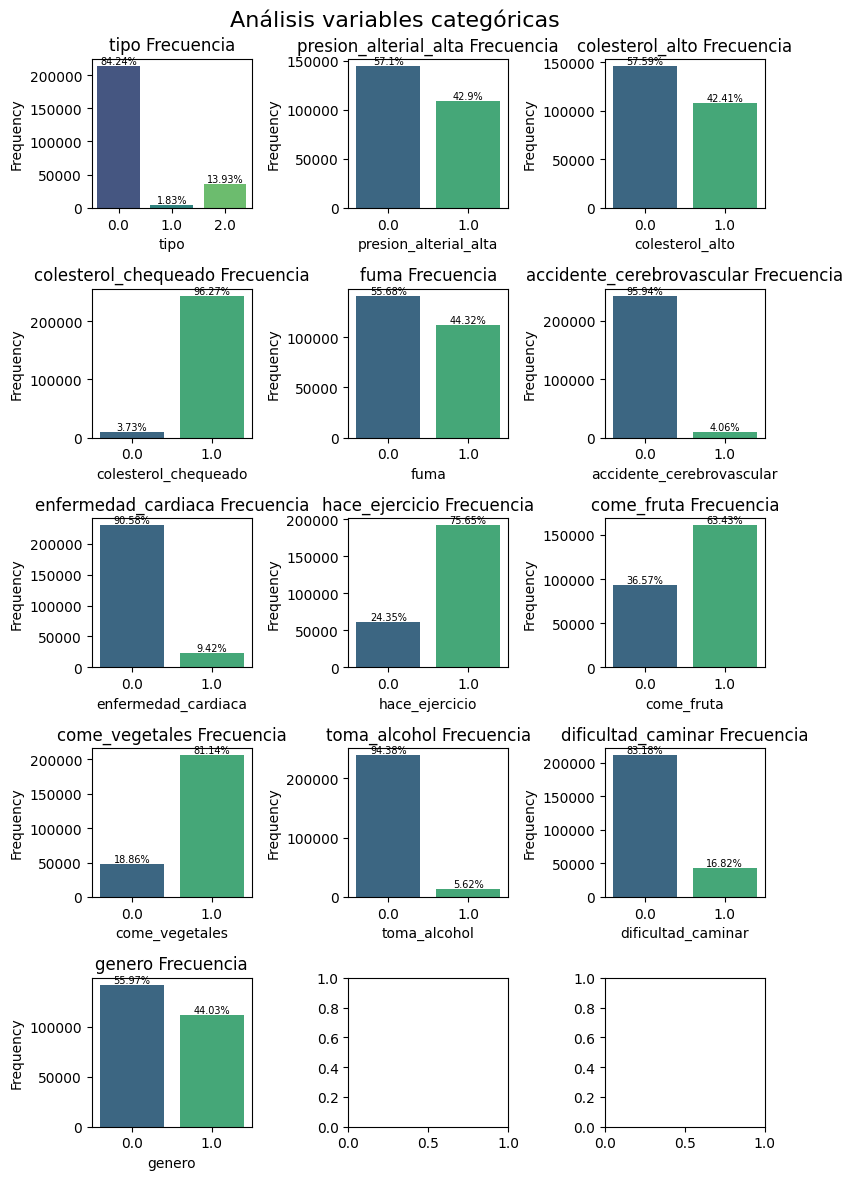

In [12]:
#gráficos de frecuencia de algunas variables de pocas categorías.
columnas = [col for col in diabetes.columns if diabetes[col].value_counts().index.shape[0] < 4] #se seleccionana variables
#con menos de 4 categorías
rows =  math.ceil(len(columnas)/3) #se define el número de filas
fig, axes = plt.subplots(rows,3, figsize=(8,12)) #se crea la matriz para la galeria
fig.suptitle("Análisis variables categóricas", fontsize=16) #itulo principal
for i,feature in enumerate(columnas):
  counts = diabetes[feature].value_counts() #hay que hacer esto para usar cada varaible como categórica pues es de tipo númerica
  ax = axes[i//3, i%3] #ojo aca, impresionante para ubicar los gráficos en la matriz
  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis") #se crea el gráfico de barras para cada varaible
  for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # Posición X: centro de la barra
            p.get_height() + 0.5,          # Posición Y: altura de la barra + un pequeño margen      # Texto: valor de la frecuencia
            f"{float(round(p.get_height()/253680*100,2))}%",        # Texto: valor de la frecuencia
            ha='center',                    # Alineación horizontal: centrada
            va='bottom',                    # Alineación vertical: en la parte superior de la barra
            fontsize=7                      # Tamaño de la fuente
        )
  axes[i//3, i%3].set_title(f"{feature} Frecuencia") #titulo a cada grafica
  axes[i//3, i%3].set_xlabel(feature)
  axes[i//3, i%3].set_ylabel("Frequency")

plt.tight_layout() #se organizan los espacios
plt.show()#se muestra

<ipython-input-13-270fb3c39fab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis")
<ipython-input-13-270fb3c39fab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis")
<ipython-input-13-270fb3c39fab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis")
<ipython-input-13-270fb3c39fab>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

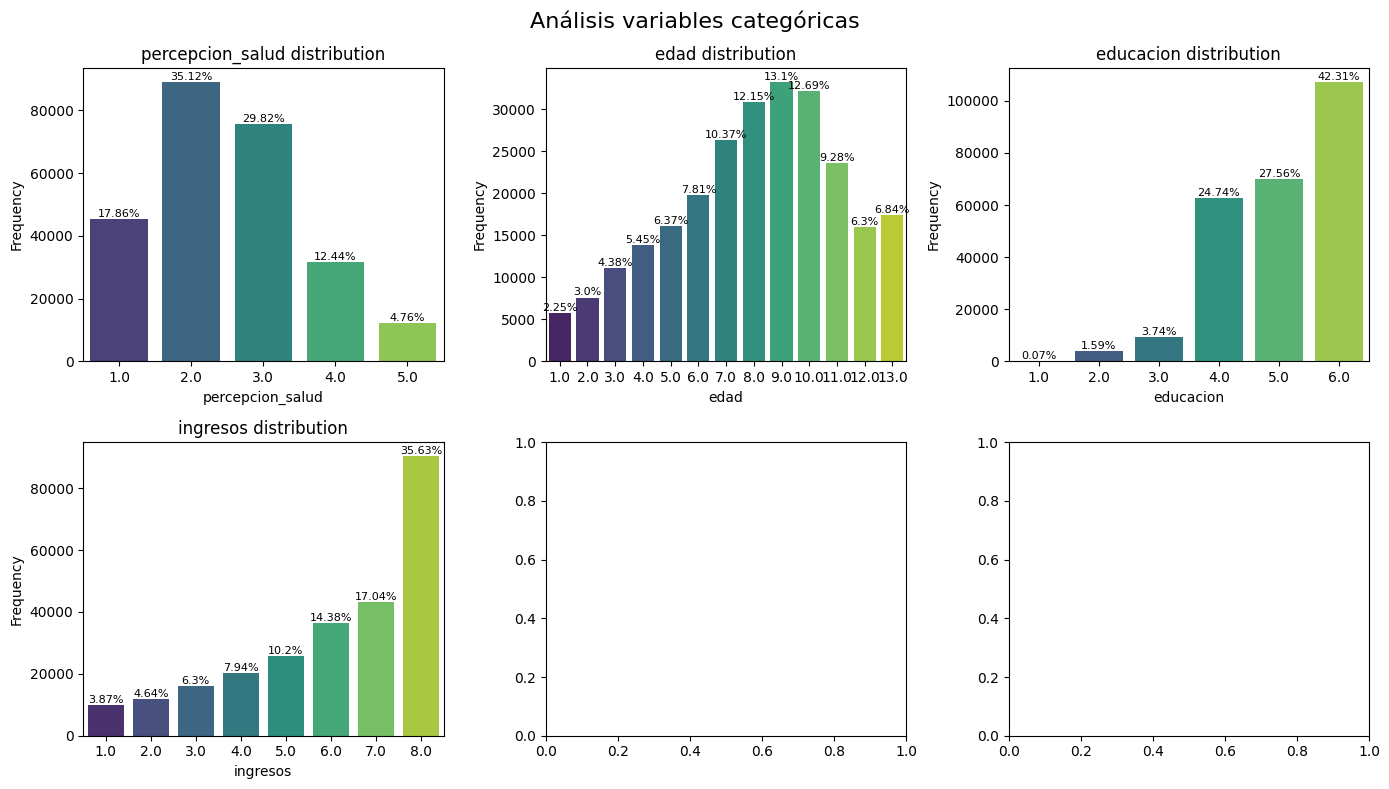

In [13]:
#gráficos de frecuencia de algunas variables de varias categorías.
columnas = [col for col in diabetes.columns if ( diabetes[col].value_counts().index.shape[0] > 4 and
                                                diabetes[col].value_counts().index.shape[0] <20) and
             col!="imc"]
rows =math.ceil(len(columnas)/3)

fig, axes = plt.subplots(rows,3, figsize=(14,8))

fig.suptitle("Análisis variables categóricas", fontsize=16)

for i,feature in enumerate(columnas):
  counts = diabetes[feature].value_counts()
  ax = axes[i//3, i%3] #ojo aca, impresionante
  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette="viridis")
  for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # Posición X: centro de la barra
            p.get_height() + 0.5,          # Posición Y: altura de la barra + un pequeño margen      # Texto: valor de la frecuencia
            f"{float(round(p.get_height()/253680*100,2))}%",        # Texto: valor de la frecuencia
            ha='center',                    # Alineación horizontal: centrada
            va='bottom',                    # Alineación vertical: en la parte superior de la barra
            fontsize=8                      # Tamaño de la fuente
        )
  axes[i//3, i%3].set_title(f"{feature} distribution")
  axes[i//3, i%3].set_xlabel(feature)
  axes[i//3, i%3].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

<ipython-input-14-afd69425ddb8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values,palette="viridis")


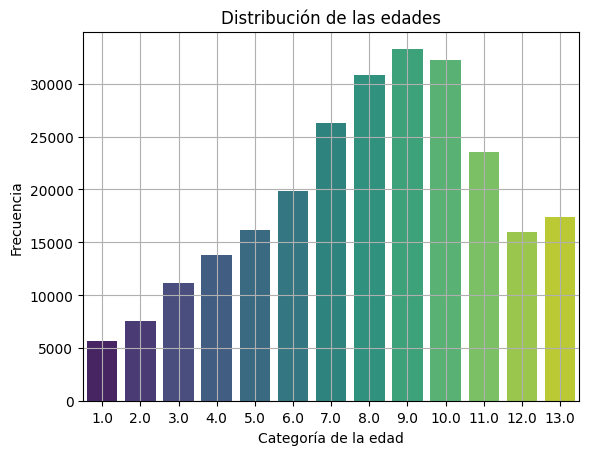

In [14]:
#visualización de  la variable edades
counts = diabetes["edad"].value_counts()
sns.barplot(x=counts.index, y=counts.values,palette="viridis")
plt.title('Distribución de las edades')
plt.xlabel('Categoría de la edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Varibales númericas
Percepcion fisica, percepcion mental e IMC. El resto son categóricas.

In [15]:
#Estadísticos
display(diabetes.percepcion_fisica.describe())
display(diabetes.percepcion_mental.describe())

,percepcion_fisica
count,253680.000000
mean,4.242081
std,8.717951
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,30.000000


,percepcion_mental
count,253680.000000
mean,3.184772
std,7.412847
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,30.000000


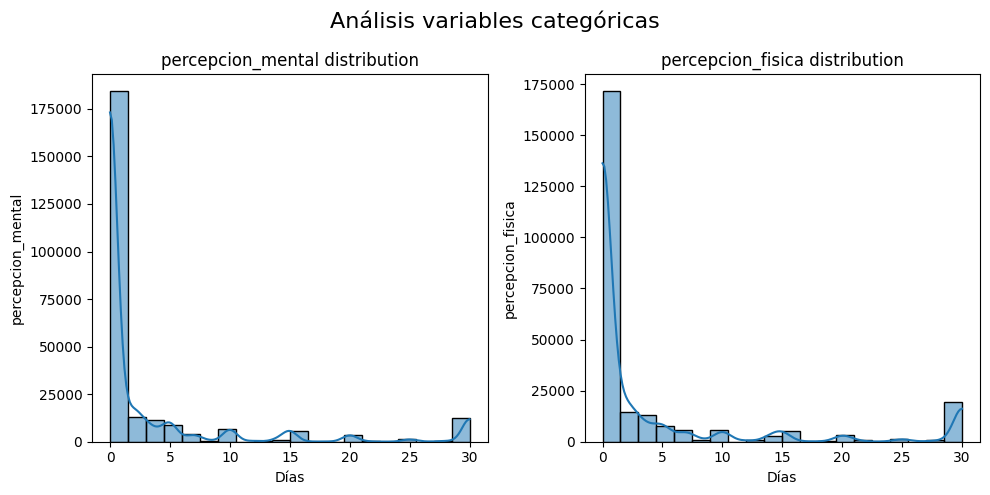

In [16]:
#vusykacupib de histogramas y densidad
columnas = [col for col in diabetes.columns if diabetes[col].value_counts().index.shape[0] > 20 and
             col!="imc"]

fig, axes = plt.subplots(1,2, figsize=(10,5))

fig.suptitle("Análisis variables categóricas", fontsize=16)

for i,feature in enumerate(columnas):
  counts = diabetes[feature].value_counts()
  ax = axes[i] #ojo aca, impresionante
  sns.histplot(diabetes[feature],kde=True,common_norm=True,bins=20,ax=ax )
  axes[i].set_title(f"{feature} distribution")
  axes[i].set_xlabel("Días")
  axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

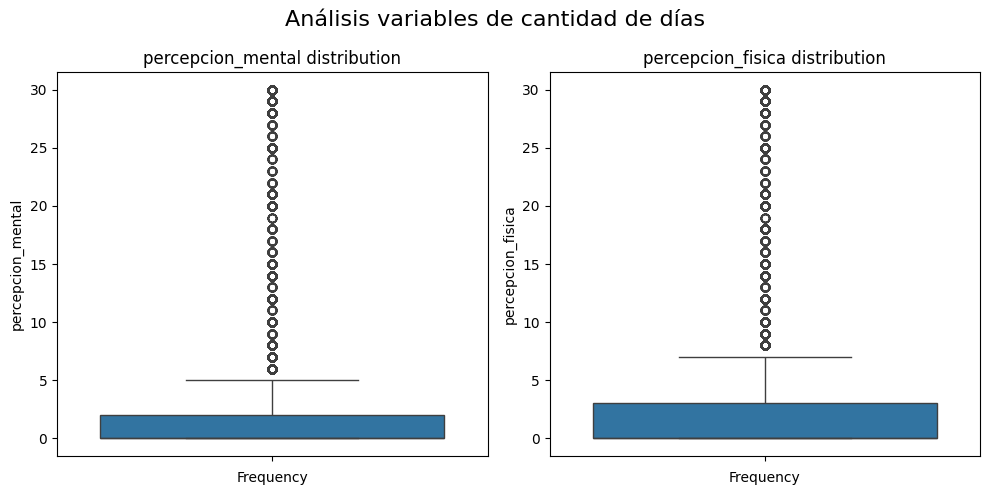

In [17]:
#en este caso se mantendran los valores atípicos ya que si puede ser significativo
columnas = [col for col in diabetes.columns if diabetes[col].value_counts().index.shape[0] > 20 and
             col!="imc"]

fig, axes = plt.subplots(1,2, figsize=(10,5))

fig.suptitle("Análisis variables de cantidad de días", fontsize=16)

for i,feature in enumerate(columnas):
  counts = diabetes[feature].value_counts()
  ax = axes[i] #ojo aca, impresionante
  sns.boxplot(diabetes[feature], ax=ax)
  axes[i].set_title(f"{feature} distribution")
  axes[i].set_xlabel("Frequency")
  axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

In [18]:
#Estadísticos
diabetes.imc.describe()
#IMC por debajo de 18.5 kg/m2: Bajo peso
#IMC entre 18.5 y 24.9 kg/m2: Peso normal
#IMC entre 25.0 y 29.9 kg/m2: Sobrepeso
#IMC de 30.0 o más kg/m2: Obesidad
#IMC mayor a 40 kg/m2: Obesidad grave o de alto riesgo

,imc
count,253680.000000
mean,28.382364
std,6.608694
min,12.000000
25%,24.000000
50%,27.000000
75%,31.000000
max,98.000000


In [19]:
#visualización de observaciones más atípicas
print(diabetes.loc[diabetes.imc.idxmin()])
print()
print(diabetes.loc[diabetes.imc.idxmax()])

tipo                          0.0
presion_alterial_alta         0.0
colesterol_alto               0.0
colesterol_chequeado          1.0
imc                          12.0
fuma                          0.0
accidente_cerebrovascular     0.0
enfermedad_cardiaca           0.0
hace_ejercicio                1.0
come_fruta                    1.0
come_vegetales                1.0
toma_alcohol                  0.0
percepcion_salud              3.0
percepcion_mental             0.0
percepcion_fisica             1.0
dificultad_caminar            0.0
genero                        1.0
edad                          9.0
educacion                     2.0
ingresos                      8.0
Name: 49827, dtype: float64

tipo                          0.0
presion_alterial_alta         0.0
colesterol_alto               1.0
colesterol_chequeado          0.0
imc                          98.0
fuma                          1.0
accidente_cerebrovascular     0.0
enfermedad_cardiaca           0.0
hace_ejercicio     

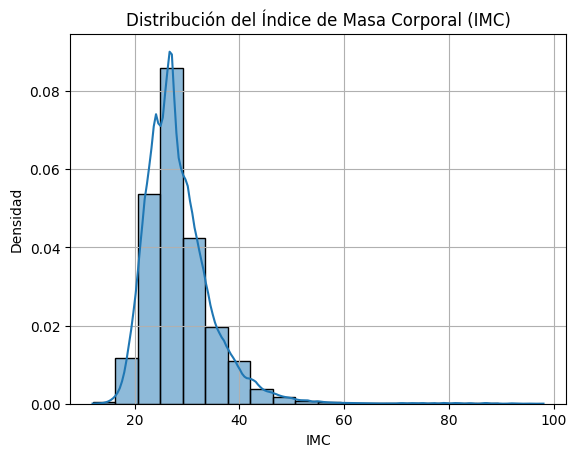

In [20]:
#Visualización de la distribución.
sns.histplot(data=diabetes, x=diabetes.imc,stat='density',kde=True,bins=20, common_norm=True)
plt.title('Distribución del Índice de Masa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()
#el common_norm normaliza los datos para que siga la curva de densidad y sea más facil de ver.

Cuándo considerar un IMC como outlier
IMC menor a 10 o mayor a 60:

Estos valores son extremos y, en la mayoría de los casos, indican errores en los datos (por ejemplo, errores de medición o entrada).

IMC entre 40 y 60:

Estos valores son posibles, pero representan casos de obesidad mórbida. Dependiendo del contexto del análisis, puedes decidir si incluirlos o manejarlos como outliers.

IMC mayor a 100:

Estos valores son biológicamente imposibles y deben ser tratados como errores.

10 y 60 son límites biologicos alcanzables, aunque representan anorexia y una obesidad morvida, son datos limites.

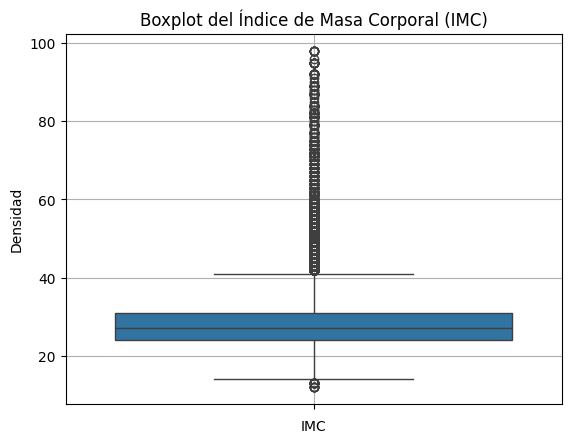

In [21]:
#Boxplot para imc
sns.boxplot(diabetes.imc) #valores atípicos
#Notese que este es un caso que hay que poner cuidado, ¿Que hacer con los valores
#atípicos? pues se tiene es indice de masa corporal y tener mayor a 50 ya es demasiada
#obesidad puede que sea posible pero hay valores hasta de 98.

plt.title('Boxplot del Índice de Masa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

A partir del análisis de las variables disponibles en la base de datos, se evidencia que la mayoría de los registros corresponden a personas que no tienen diabetes, mientras que la clase prediabética está significativamente subrepresentada. Esta situación representa un desafío para los modelos de clasificación, ya que puede generar un sesgo hacia la clase mayoritaria, afectando la capacidad del modelo para identificar correctamente los casos menos frecuentes.

Por otro lado, variables como “colesterol chequeado” y “accidente cerebrovascular” presentan una distribución altamente desequilibrada, con más del 90% de los datos concentrados en una sola categoría. Esto indica que estas variables podrían no aportar valor al modelo e incluso inducir sesgos durante el entrenamiento.

También se observa que la mayoría de las personas califican su estado de salud como “bueno” o “muy bueno”, lo que limita la variabilidad de esa variable. Además, la mayoría de los individuos se encuentran en el rango de edad entre 40 y 75 años, y en términos de nivel educativo e ingresos, predominan personas con formación profesional (pregrado) y salarios superiores a 75.000 dólares anuales.

En cuanto a las variables percepción física y percepción mental (número de días en los últimos 30 en que la persona se sintió mal física o mentalmente), se observa que la mayoría de los registros indican ningún día malo, aunque también existen casos atípicos de personas que reportan sentirse mal todos los días, lo cual resulta relevante al analizar el impacto de la salud mental y física en la aparición de enfermedades crónicas como la diabetes.

Finalmente, para el índice de masa corporal (IMC), se encuentra un promedio de 28.38 kg/m², lo cual se considera en el rango de sobrepeso. No obstante, se identificaron valores atípicos extremos, como 7 personas con un IMC de 98 kg/m², lo cual es altamente inusual y podría afectar el desempeño del modelo. Por esta razón, se decidió construir dos versiones del modelo: una considerando todos los datos, y otra excluyendo estos valores atípicos para evaluar su impacto en los resultados.

# Bases de datos a utilizar.
Se llevara a cabo de la siguiente manera:
1. base de datos de diabetes completa, con todos los datos atípicos
2. base de datos de diabetes sin datos atípicos(hasta limite superior e inferior)
3. base de datos con datos hasta 3 veces la desviación estandar.

In [22]:
#base de datos comlpleta
diabetes_completa = diabetes.copy() #copia de la base de datos completa
print(f"base de datos con todas los atípicos con { diabetes_completa.shape[0]} filas.")

#base de datos sin atípicos
q1 = diabetes.imc.quantile(0.25)
q3 = diabetes.imc.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr
diabetes_sin_atipicos = diabetes[(diabetes.imc >= limite_inferior) & (diabetes.imc <= limite_superior)]
print(f"base de datos sin los atípicos con { diabetes_sin_atipicos.shape[0]} filas.")

#base de datos hasta 3 desviaciones estandar
diabetes_3desv = diabetes[(diabetes.imc <= diabetes.imc.mean() + 3*diabetes.imc.std()) & (diabetes.imc >= diabetes.imc.mean() - 3*diabetes.imc.std())]
print(f"base de datos con datos hasta 3 desviaciones estandar con { diabetes_3desv.shape[0]} fila.")

base de datos con todas los atípicos con 253680 filas.
base de datos sin los atípicos con 243833 filas.
base de datos con datos hasta 3 desviaciones estandar con 250717 fila.


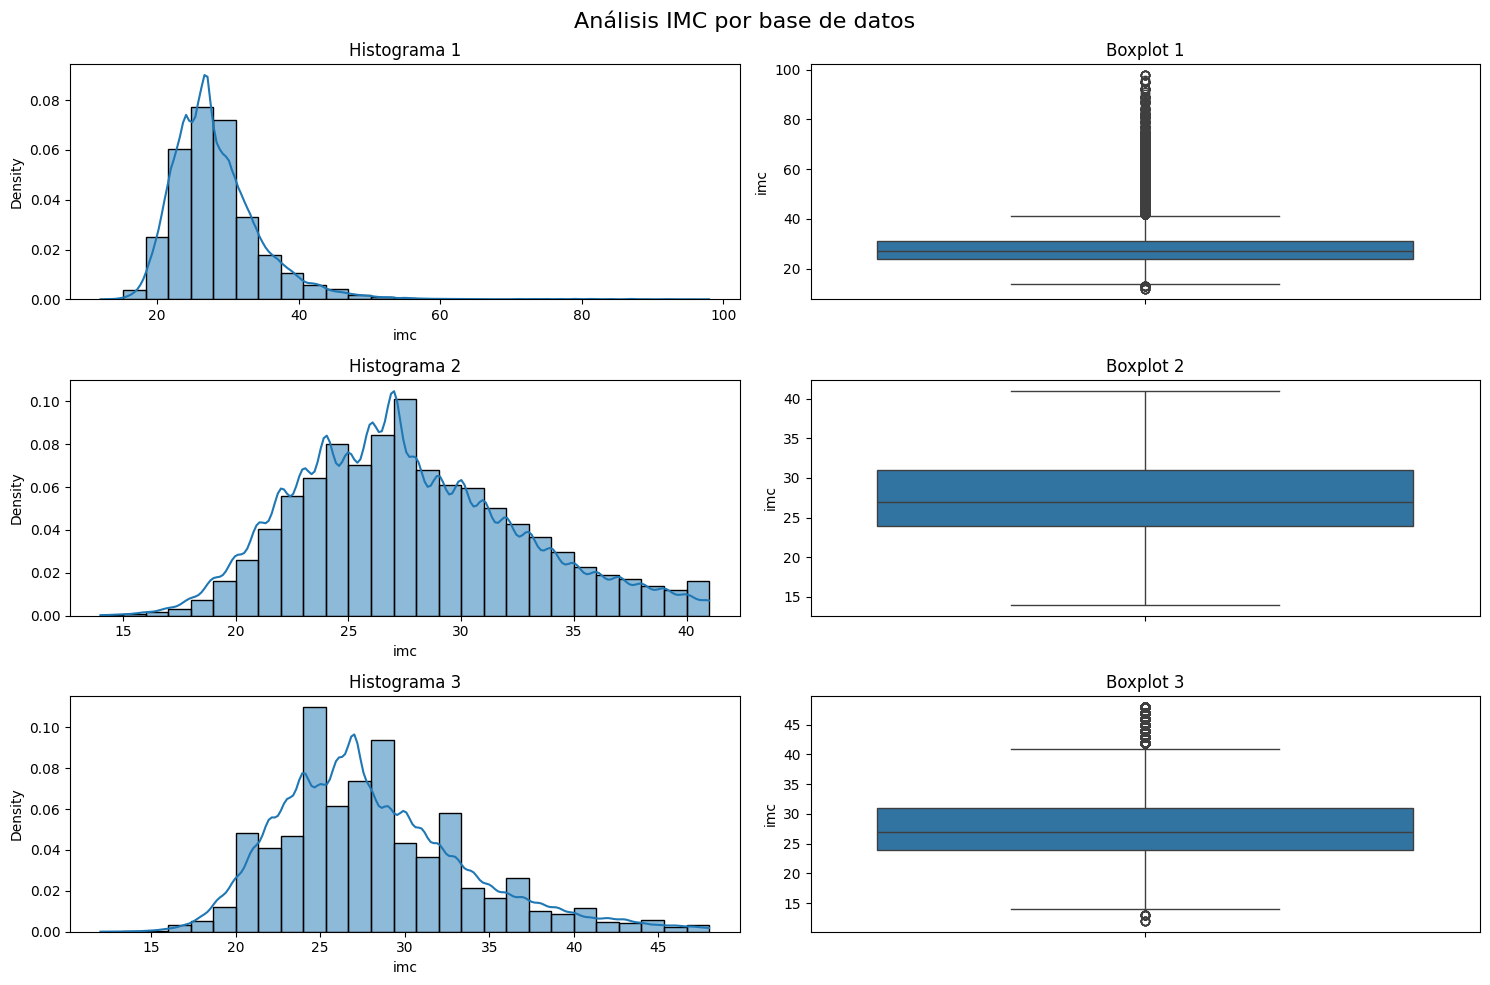

In [23]:
#comparación de bases de datos deferenciando con atípicos.
fig, axes = plt.subplots(3,2, figsize=(15,10))
fig.suptitle("Análisis IMC por base de datos", fontsize=16)
for i,data_base in enumerate([diabetes_completa,diabetes_sin_atipicos,diabetes_3desv]):
  ax1 = axes[i,0]
  ax2 = axes[i,1]
  sns.histplot(data=data_base,x=data_base["imc"],stat='density',kde=True,bins=27, common_norm=True,ax=ax1)
  sns.boxplot(data_base["imc"],ax=ax2)
  ax1.set_title(f"Histograma {i+1}")
  ax2.set_title(f"Boxplot {i+1}")

plt.tight_layout()
plt.show()

# Análisis bivariado
Idealmente se estudian los pares de variables que tienen sentido analizar en función del problema de estudio. No es eficiente analizar todas las combinaciones posibles, especialmente en bases de datos grandes, ya que muchas relaciones pueden no tener significado práctico o pueden ser triviales.

Diabetes vs imc → ¿Las personas con mayor imc tienen más probabilidad de tener diabetes?

Diabetes vs Edad → ¿El riesgo de diabetes aumenta con la edad?

Diabetes vs Ejercicio (PhysActivity) → ¿Las personas que hacen ejercicio tienen menor riesgo de diabetes?

Diabetes vs Alimentación (Fruits, Veggies) → ¿El consumo de frutas y verduras reduce el riesgo de diabetes?

Diabetes vs Hipertensión (HighBP) y Colesterol (HighChol) → ¿Las personas con diabetes tienen mayor frecuencia de hipertensión y colesterol alto?

Ingresos vs Salud General

Ojo, aca el coeficiente de correalción de pearson no es tan util ya que se tienen es variables categóricas.

Si una variable es categórica y otra numérica, se puede hacer un análisis de diferencias de medias (ANOVA, t-test).

Si ambas son numéricas, se usa correlación (Pearson, Spearman).

Si ambas son categóricas, se usa una tabla de contingencia y el test de chi-cuadrado.

**Entre variables númericas**
Las variables númericas que se tienen, no tienen suficiente importancia para un análisis entre ellas, además, el análisis con la variable target debe ser diferente ya que es categórica.

**Entre variables númericas y categóricas**

1.Categóricas por IMC

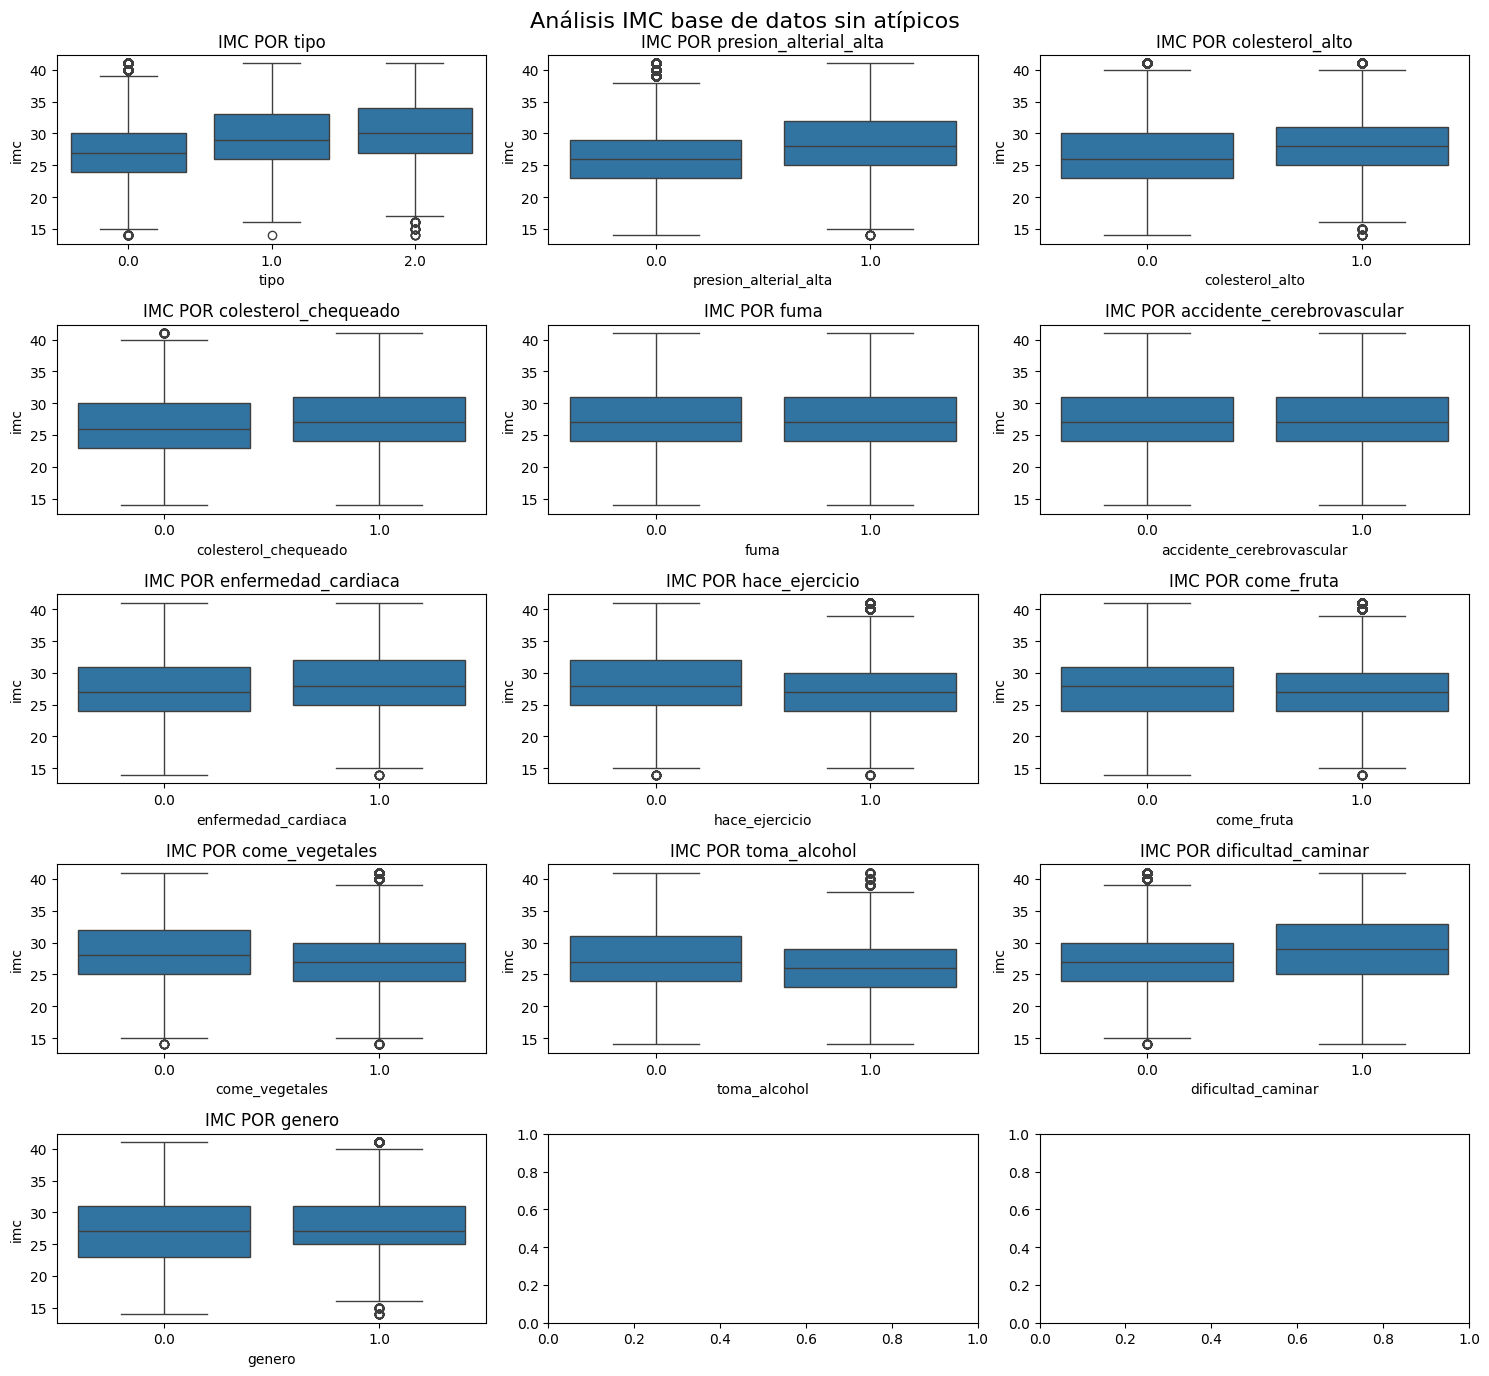

In [24]:
#GRÁFICA PERO CON LA BASE DE DATOS SIN DATOS ATÍPICOS (Para que se vea más, sin embargo el comportamiento es igual para todo)
columnas = [col for col in diabetes_sin_atipicos.columns if diabetes_sin_atipicos[col].value_counts().index.shape[0] < 4] #se seleccionana variables
#con menos de 4 categorías
rows =  math.ceil(len(columnas)/3) #se define el número de filas
fig, axes = plt.subplots(rows,3, figsize=(15,14)) #se crea la matriz para la galeria
fig.suptitle("Análisis IMC base de datos sin atípicos", fontsize=16) #itulo principal
for i,feature in enumerate(columnas):
  counts = diabetes_sin_atipicos[feature].value_counts() #hay que hacer esto para usar cada varaible como categórica pues es de tipo númerica
  ax = axes[i//3, i%3] #ojo aca, impresionante para ubicar los gráficos en la matriz
  sns.boxplot(x=diabetes_sin_atipicos[feature], y=diabetes_sin_atipicos.imc, ax=ax) #se crea el gráfico de barras para cada varaible
  axes[i//3, i%3].set_title(f"IMC POR {feature}") #titulo a cada grafica

plt.tight_layout() #se organizan los espacios
plt.show()#se muestra

<ipython-input-25-8a20c6c65c5b>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hue=diabetes_sin_atipicos[feature], x=diabetes_sin_atipicos.imc, ax=ax, shade=True, palette='viridis') #se crea el gráfico de barras para cada varaible
<ipython-input-25-8a20c6c65c5b>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hue=diabetes_sin_atipicos[feature], x=diabetes_sin_atipicos.imc, ax=ax, shade=True, palette='viridis') #se crea el gráfico de barras para cada varaible
<ipython-input-25-8a20c6c65c5b>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hue=diabetes_sin_atipicos[feature], x=diabetes_sin_atipicos.imc, ax=ax, shade=

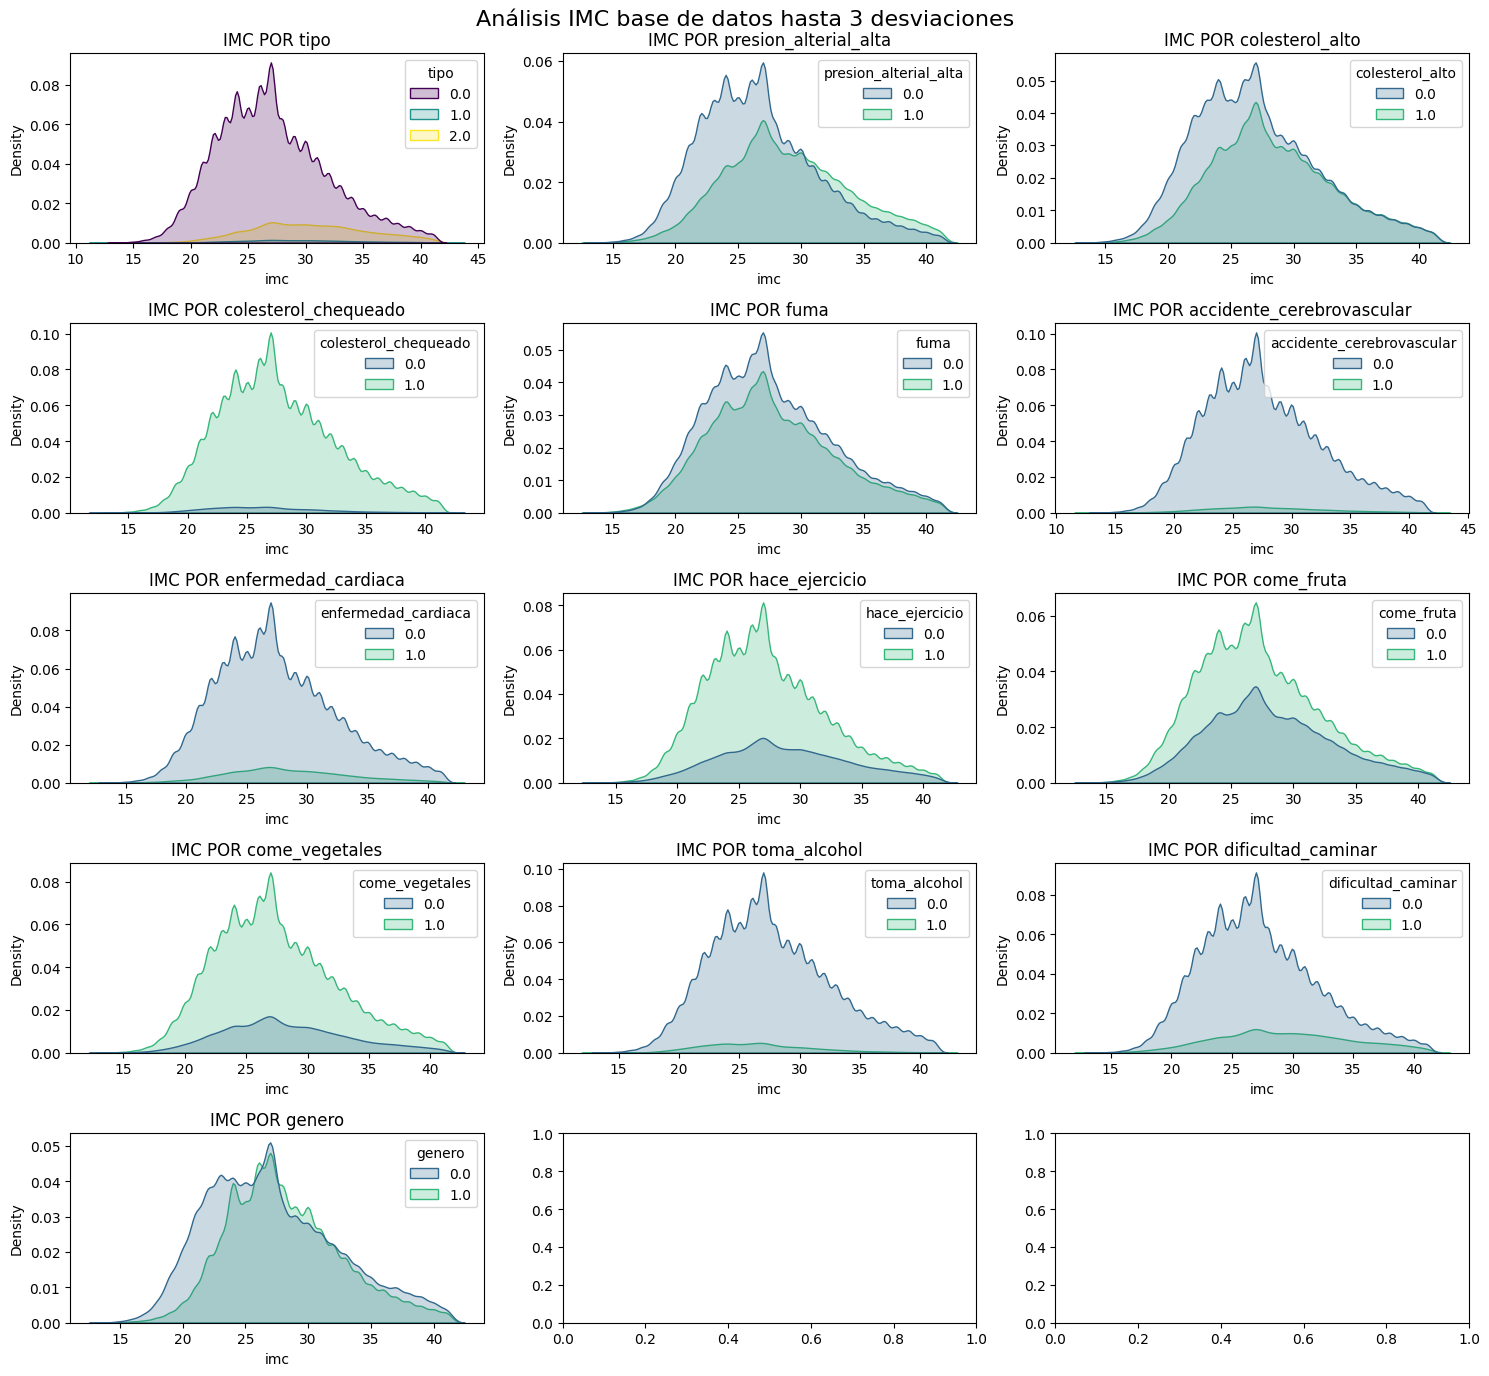

In [25]:
#GRÁFICO DE DENSIDADES POR IMC CON CADA CATEGÓRICA
columnas = [col for col in diabetes_sin_atipicos.columns if diabetes_sin_atipicos[col].value_counts().index.shape[0] < 4] #se seleccionana variables
#con menos de 4 categorías
rows =  math.ceil(len(columnas)/3) #se define el número de filas
fig, axes = plt.subplots(rows,3, figsize=(15,14)) #se crea la matriz para la galeria
fig.suptitle("Análisis IMC base de datos hasta 3 desviaciones", fontsize=16) #itulo principal
for i,feature in enumerate(columnas):
  counts = diabetes_sin_atipicos[feature].value_counts() #hay que hacer esto para usar cada varaible como categórica pues es de tipo númerica
  ax = axes[i//3, i%3] #ojo aca, impresionante para ubicar los gráficos en la matriz
  sns.kdeplot(hue=diabetes_sin_atipicos[feature], x=diabetes_sin_atipicos.imc, ax=ax, shade=True, palette='viridis') #se crea el gráfico de barras para cada varaible
  axes[i//3, i%3].set_title(f"IMC POR {feature}") #titulo a cada grafica

plt.tight_layout() #se organizan los espacios
plt.show()#se muestra

In [28]:
#Verificar la relación entre las diferentes categorías de variable
#tipo para la variable de indice de masa corporal.
# Separar los datos por categoría
grupo_no_diabetes = diabetes_completa[diabetes_completa['tipo'] == 0]['imc']
grupo_pre_diabetes = diabetes_completa[diabetes_completa['tipo'] == 1]['imc']
grupo_diabetes = diabetes_completa[diabetes_completa['tipo'] == 2]['imc']

# Realizar la prueba ANOVA
f_stat, p_value = stats.f_oneway(grupo_no_diabetes, grupo_pre_diabetes, grupo_diabetes)
print(f"Estadístico F: {f_stat:.3f}, Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas en el IMC entre los grupos.")
else:
    print("No hay diferencias significativas en el IMC entre los grupos.")

#o

# Realizar la prueba de Kruskal-Wallis
h_stat, p_value = stats.kruskal(grupo_no_diabetes, grupo_pre_diabetes, grupo_diabetes)
print(f"Estadístico H: {h_stat:.3f}, Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Hay diferencias significativas en el IMC entre los grupos.")
else:
    print("No hay diferencias significativas en el IMC entre los grupos.")

Estadístico F: 6768.361, Valor p: 0.0000
Hay diferencias significativas en el IMC entre los grupos.
Estadístico H: 14130.750, Valor p: 0.0000
Hay diferencias significativas en el IMC entre los grupos.


**Variables categóricas con categóricas**
Crear una tabla de contingencia para ver la frecuencia de las combinaciones.

Visualizar la relación con un gráfico de barras apiladas o un mapa de calor.

Realizar una prueba de chi-cuadrado para evaluar la independencia.

Diabetes vs Edad → ¿El riesgo de diabetes aumenta con la edad?

Diabetes vs Ejercicio (PhysActivity) → ¿Las personas que hacen ejercicio tienen menor riesgo de diabetes?

Diabetes vs Hipertensión (HighBP) y Colesterol (HighChol) → ¿Las personas con diabetes tienen mayor frecuencia de hipertensión y colesterol alto?

Nota, cuando el conjunto de datos, es muy grande, hacer la prueba chi-cuadrado no es sufciente, también es bueno complementar con el estadístico V de cramer
V = raiz(X^2 / n*min(r-1,c-1)
X^2:estadístico chi-cuadrado,
n: número de obs
r: filas, c:columnas

y la regla es que
V<0.1: Asociación trivial o inexistente

0.1≤V<0.3: Asociación débil.

V≥0.3: Asociación moderada/fuerte.


edad  1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    10.0  \
tipo                                                                       
0.0   5601  7404  10737  13055  14943  17765  22808  26019  26809  24939   
1.0     21    54     72    142    163    312    418    550    702    697   
2.0     78   140    314    626   1051   1742   3088   4263   5733   6558   

edad   11.0   12.0   13.0  
tipo                       
0.0   17790  12132  13701  
1.0     602    445    453  
2.0    5141   3403   3209  


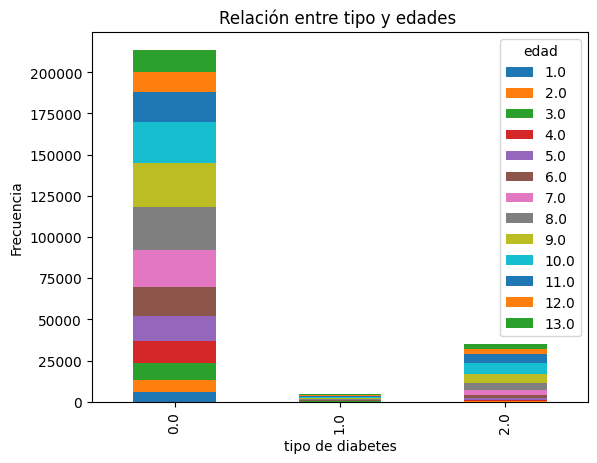


Estadístico Chi-cuadrado: 9641.377, Valor p: 0.0000
 Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo

V de Cramér: 0.0447


In [30]:
#diabetes y edad
#tabla de contingencia
tabla_contingencia = pd.crosstab(diabetes_completa['tipo'], diabetes_completa['edad'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre tipo y edades ')
plt.xlabel('tipo de diabetes')
plt.ylabel('Frecuencia')
plt.show()

chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
print()
print(f"Estadístico Chi-cuadrado: {chi2:.3f}, Valor p: {p_value:.4f}")
#si se rechaza H0 son dependientes, si no se rechaza H0 son independientes

n = diabetes.shape[0]  # Total de observaciones
min_dim = min(diabetes.shape) - 1  # Mínimo entre (filas-1) y (columnas-1)
v_cramer = np.sqrt(chi2 / (n * min_dim))


# Interpretación
if p_value < 0.05:
    print(" Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo")
else:
    print(" No hay relación significativa (no rechazamos H0) entonces se excluye del modelo")

print(f"\nV de Cramér: {v_cramer:.4f}")

hace_ejercicio    0.0     1.0
tipo                         
0.0             47212  166491
1.0              1489    3142
2.0             13059   22287


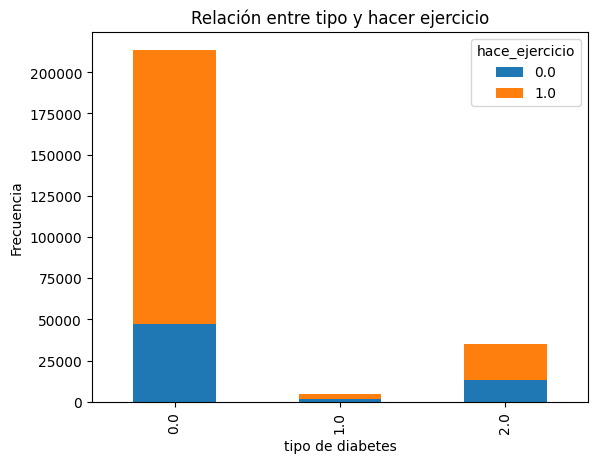


Estadístico Chi-cuadrado: 3789.301, Valor p: 0.0000
 Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo

V de Cramér: 0.0447


In [31]:
#diabetes y hace_ejercicio
#tabla de contingencia
tabla_contingencia = pd.crosstab(diabetes_completa['tipo'], diabetes_completa['hace_ejercicio'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre tipo y hacer ejercicio')
plt.xlabel('tipo de diabetes')
plt.ylabel('Frecuencia')
plt.show()

chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
print()
print(f"Estadístico Chi-cuadrado: {chi2_stat:.3f}, Valor p: {p_value:.4f}")
#si se rechaza H0 son dependientes, si no se rechaza H0 son independientes

n = diabetes.shape[0]  # Total de observaciones
min_dim = min(diabetes.shape) - 1  # Mínimo entre (filas-1) y (columnas-1)
v_cramer = np.sqrt(chi2 / (n * min_dim))


# Interpretación
if p_value < 0.05:
    print(" Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo")
else:
    print(" No hay relación significativa (no rechazamos H0) entonces se excluye del modelo")

print(f"\nV de Cramér: {v_cramer:.4f}")

colesterol_alto     0.0    1.0
tipo                          
0.0              132673  81030
1.0                1756   2875
2.0               11660  23686


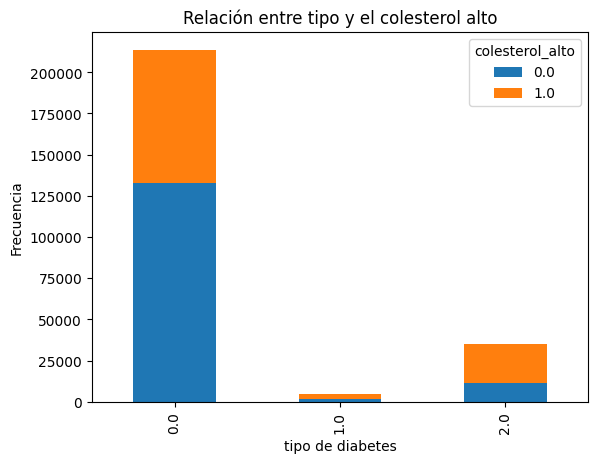


Estadístico Chi-cuadrado: 11258.920, Valor p: 0.0000
 Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo

V de Cramér: 0.0483


In [32]:
#diabetes y colesterol alto
#tabla de contingencia
tabla_contingencia = pd.crosstab(diabetes_completa['tipo'], diabetes_completa['colesterol_alto'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre tipo y el colesterol alto')
plt.xlabel('tipo de diabetes')
plt.ylabel('Frecuencia')
plt.show()

chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
print()
print(f"Estadístico Chi-cuadrado: {chi2_stat:.3f}, Valor p: {p_value:.4f}")
#si se rechaza H0 son dependientes, si no se rechaza H0 son independientes

n = diabetes.shape[0]  # Total de observaciones
min_dim = min(diabetes.shape) - 1  # Mínimo entre (filas-1) y (columnas-1)
v_cramer = np.sqrt(chi2_stat / (n * min_dim))


# Interpretación
if p_value < 0.05:
    print(" Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo")
else:
    print(" No hay relación significativa (no rechazamos H0) entonces se excluye del modelo")

print(f"\nV de Cramér: {v_cramer:.4f}")

presion_alterial_alta     0.0    1.0
tipo                                
0.0                    134391  79312
1.0                      1718   2913
2.0                      8742  26604


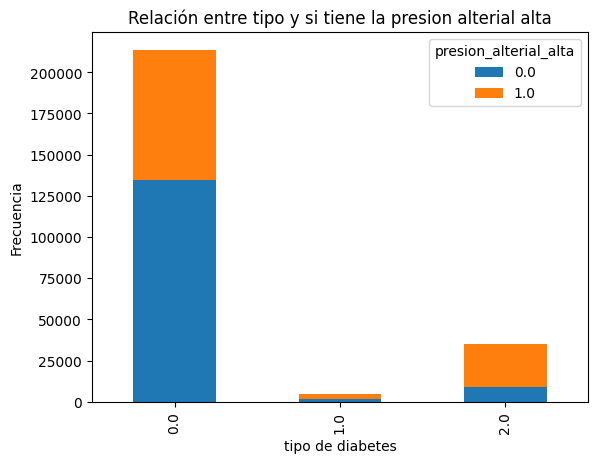


Estadístico Chi-cuadrado: 18794.644, Valor p: 0.0000
 Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo

V de Cramér: 0.0624


In [33]:
#diabetes y presion_alterial_alta
#tabla de contingencia
tabla_contingencia = pd.crosstab(diabetes_completa['tipo'], diabetes_completa['presion_alterial_alta'])
print(tabla_contingencia)
tabla_contingencia.plot(kind='bar', stacked=True)
plt.title('Relación entre tipo y si tiene la presion alterial alta')
plt.xlabel('tipo de diabetes')
plt.ylabel('Frecuencia')
plt.show()

chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
print()
print(f"Estadístico Chi-cuadrado: {chi2_stat:.3f}, Valor p: {p_value:.4f}")
#si se rechaza H0 son dependientes, si no se rechaza H0 son independientes

n = diabetes.shape[0]  # Total de observaciones
min_dim = min(diabetes.shape) - 1  # Mínimo entre (filas-1) y (columnas-1)
v_cramer = np.sqrt(chi2_stat / (n * min_dim))


# Interpretación
if p_value < 0.05:
    print(" Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo")
else:
    print(" No hay relación significativa (no rechazamos H0) entonces se excluye del modelo")

print(f"\nV de Cramér: {v_cramer:.4f}")

fuma     0.0    1.0
tipo               
0.0   121879  91824
1.0     2349   2282
2.0    17029  18317


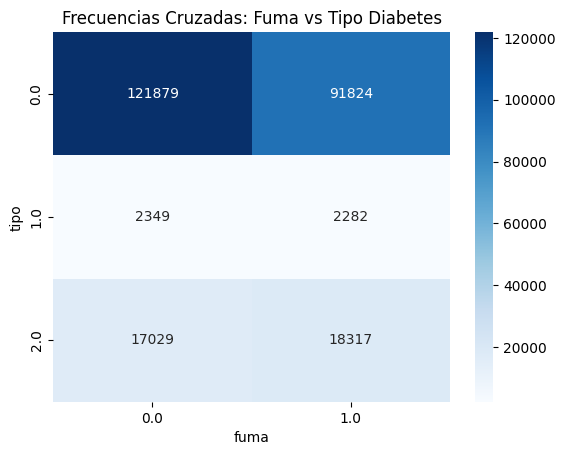


prueba chi-cuadrado y V de cramer
Valor p: 0.0000
 Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo

V de Cramér: 0.0145


In [34]:
#relación entre tipo y fuma
#tabla de contingencia
tabla_contingencia = pd.crosstab(diabetes['tipo'], diabetes['fuma'])
print(tabla_contingencia)

sns.heatmap(tabla_contingencia, annot=True, fmt='d', cmap='Blues')
plt.title('Frecuencias Cruzadas: Fuma vs Tipo Diabetes')
plt.show()

print()
print("prueba chi-cuadrado y V de cramer")
chi2, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
print(f"Valor p: {p_value:.4f}")

n = diabetes.shape[0]  # Total de observaciones
min_dim = min(diabetes.shape) - 1  # Mínimo entre (filas-1) y (columnas-1)
v_cramer = np.sqrt(chi2 / (n * min_dim))


# Interpretación
if p_value < 0.05:
    print(" Hay relación significativa (rechazamos H0) entonces se debe dejar en el modelo")
else:
    print(" No hay relación significativa (no rechazamos H0) entonces se excluye del modelo")

print(f"\nV de Cramér: {v_cramer:.4f}")


**conclusión**
El análisis bivariado muestra que, si bien los rangos intercuartílicos del índice de masa corporal (IMC) se superponen entre las distintas categorías del target, existen diferencias significativas en los promedios. En particular, las personas con diabetes tienden a presentar un IMC más elevado, mientras que aquellos que realizan ejercicio físico regularmente o consumen frutas y vegetales muestran un IMC más bajo. Estos patrones coinciden con lo reportado en la literatura médica, donde un IMC elevado se asocia a condiciones metabólicas adversas, mientras que los hábitos saludables contribuyen al control del peso corporal.

No obstante, el traslape observado en las distribuciones sugiere que el IMC por sí solo no es suficiente para distinguir claramente entre los grupos, lo cual refuerza la necesidad de incorporar múltiples variables en los modelos predictivos para obtener una clasificación más precisa.

En cuanto a las variables categóricas de interés, el análisis estadístico indica una asociación significativa entre el target y variables como colesterol alto, presión arterial elevada, hábito de fumar, práctica de ejercicio y edad (p < 0.001 en todos los casos). Sin embargo, la magnitud de estas asociaciones es baja, con valores de V de Cramér inferiores a 0.01 para cada una, lo que sugiere una dependencia débil. A pesar de ello, dada su relevancia clínica y su respaldo en la literatura, se decidió conservar estas variables en el modelo, interpretando sus aportes con cautela.

# Selección de variables
Hasta este punto, las variables seleccionadas para la construcción del modelo son: tipo (variable objetivo), presión arterial alta, colesterol alto, IMC, enfermedad cardíaca, práctica de ejercicio, consumo de frutas, consumo de vegetales, edad, dificultad para caminar, género y hábito de fumar.

La elección de estas variables no se basó exclusivamente en pruebas estadísticas, ya que algunas de ellas no presentaron una asociación fuerte con la variable objetivo en el análisis exploratorio. Sin embargo, fueron seleccionadas a partir de una revisión conceptual y bibliográfica, considerando su relevancia clínica y teórica en el desarrollo de enfermedades metabólicas como la diabetes. Estas variables representan factores de riesgo comúnmente asociados en la literatura médica y epidemiológica, por lo cual se decidió mantenerlas en el modelo a pesar de la baja magnitud estadística observada en ciertos casos.

# Análisis multivariado
Dado que el objetivo es evaluar el impacto específico de variables categóricas seleccionadas sobre el target, se optó por realizar análisis bivariados y aplicar modelos predictivos, evitando técnicas de reducción de dimensionalidad como el Análisis de Correspondencias Múltiples (MCA), ya que no ofrecen interpretaciones directamente accionables en este contexto.

In [35]:
#Creación de bases de datos para el respectivo entreno de los modelos
seleccionados_completa = diabetes[["tipo", 'presion_alterial_alta', "colesterol_alto",
                                "imc","enfermedad_cardiaca", "hace_ejercicio", "come_fruta",
                                "come_vegetales", "edad","dificultad_caminar",
                                "genero","fuma"]]
seleccionados_sin_atipicos = diabetes_sin_atipicos[["tipo", 'presion_alterial_alta', "colesterol_alto",
                                "imc","enfermedad_cardiaca", "hace_ejercicio", "come_fruta",
                                "come_vegetales", "edad","dificultad_caminar",
                                "genero","fuma"]]

seleccionados_3desv = diabetes_3desv[["tipo", 'presion_alterial_alta', "colesterol_alto",
                                "imc","enfermedad_cardiaca", "hace_ejercicio", "come_fruta",
                                "come_vegetales", "edad","dificultad_caminar",
                                "genero","fuma"]]

# **Balanceo de datos**
Durante la exploración de los datos se evidenció un desequilibrio significativo en la variable objetivo, donde la mayoría de los registros correspondían a personas no diabéticas. Las clases de personas con prediabetes y diabetes estaban considerablemente subrepresentadas. Esta desproporción puede generar sesgos en el entrenamiento del modelo, ya que los algoritmos tienden a favorecer la predicción de la clase mayoritaria, obteniendo una aparente alta precisión (accuracy) pero fallando en la detección de las clases minoritarias, que en este caso son justamente las más importantes desde el punto de vista clínico y preventivo.

Para mitigar este problema, fue necesario balancear las bases de datos antes del entrenamiento. Esto permitió al modelo aprender patrones representativos de todas las clases, mejorando su capacidad para identificar correctamente a personas en riesgo de prediabetes o diabetes, sin perder sensibilidad ni equidad en la clasificación.



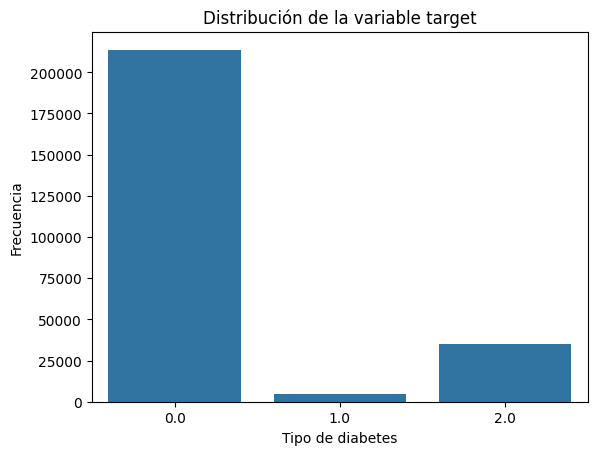

In [36]:
#Distribucion inicial de variable target que se comporta de una manera muy parecida
#para las otras dos bases de datos
sns.barplot(x=seleccionados_completa['tipo'].value_counts().index, y=seleccionados_completa['tipo'].value_counts().values)
plt.title('Distribución de la variable target')
plt.xlabel('Tipo de diabetes')
plt.ylabel('Frecuencia')
plt.show()

In [37]:
#Identificar si hay desbalance
class_distribution = seleccionados_completa['tipo'].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)

Distribución de clases antes del balanceo:
tipo
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [38]:
# Definir variables predictoras y la variable objetivo
X = seleccionados_completa.drop(columns=["tipo"])
y = seleccionados_completa['tipo']

# Usaremos smote + tomek links para equilibar el dataset y mejorar la seraración entre clases eliminando muestras ruidosas

In [40]:
#Base de datos completa
smote = SMOTE(sampling_strategy='auto', random_state=42) # Amplifica el número de instancias
X_resampled, y_resampled = smote.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["tipo"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Número de muestras después de SMOTE + Tomek: 637481
Distribución después de SMOTE + Tomek:
tipo
0.0    213692
1.0    211897
2.0    211892
Name: count, dtype: int64


In [41]:
X_combined = pd.DataFrame(X_combined, columns=X.columns)
y_combined = pd.DataFrame(y_combined, columns=["tipo"])
data_balanced = pd.concat([X_combined, y_combined], axis=1)

In [ ]:
#Descargar base de datos completa con las variables seleccionadas
seleccionados_completa.to_csv("datos_completos.csv", index=False)

In [ ]:
#Descargar base de datos completa balanceada con las variables seleccionadas
data_balanced.to_csv("datos_completos_balanceados.csv", index=False)

In [ ]:
#Descargar base de datos sin atípicos con las variables seleccionadas
seleccionados_sin_atipicos.to_csv("datos_sin_atipicos.csv", index=False)

In [43]:
#Balancear al base de datos sin atípicos
class_distribution = seleccionados_sin_atipicos['tipo'].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)
X = seleccionados_sin_atipicos.drop(columns=["tipo"])
y = seleccionados_sin_atipicos['tipo']

smote = SMOTE(sampling_strategy='auto', random_state=42) # Amplifica el número de instancias
X_resampled, y_resampled = smote.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["tipo"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())


Distribución de clases antes del balanceo:
tipo
0.0    207514
2.0     31979
1.0      4340
Name: count, dtype: int64
Número de muestras después de SMOTE + Tomek: 618742
Distribución después de SMOTE + Tomek:
tipo
0.0    207513
1.0    205615
2.0    205614
Name: count, dtype: int64


In [ ]:
X_combined = pd.DataFrame(X_combined, columns=X.columns)
y_combined = pd.DataFrame(y_combined, columns=["tipo"])
data_balanced = pd.concat([X_combined, y_combined], axis=1)

In [ ]:
#Descargar base de datos sin atípicos balanceada con las variables seleccionadas
data_balanced.to_csv("datos_sin_atipicos_balanceados.csv", index=False)

In [ ]:
#Descargar base de datos hasta 3 dsv con las variables seleccionadas
seleccionados_3desv.to_csv("datos_3dsv.csv", index=False)

In [44]:
class_distribution = seleccionados_3desv['tipo'].value_counts()
print("Distribución de clases antes del balanceo:")
print(class_distribution)
X = seleccionados_3desv.drop(columns=["tipo"])
y = seleccionados_3desv['tipo']
smote = SMOTE(sampling_strategy='auto', random_state=42) # Amplifica el número de instancias
X_resampled, y_resampled = smote.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=42)
X_combined, y_combined = smote_tomek.fit_resample(X, y)
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced["tipo"] = y_resampled  # Agregar la variable objetivo balanceada reemplazando la anterior
print("Número de muestras después de SMOTE + Tomek:", len(y_combined))
print("Distribución después de SMOTE + Tomek:")
print(pd.Series(y_combined).value_counts())

Distribución de clases antes del balanceo:
tipo
0.0    211852
2.0     34329
1.0      4536
Name: count, dtype: int64
Número de muestras después de SMOTE + Tomek: 631848
Distribución después de SMOTE + Tomek:
tipo
0.0    211847
1.0    210003
2.0    209998
Name: count, dtype: int64


In [45]:
X_combined = pd.DataFrame(X_combined, columns=X.columns)
y_combined = pd.DataFrame(y_combined, columns=["tipo"])
data_balanced = pd.concat([X_combined, y_combined], axis=1)

In [46]:
data_balanced.shape

(631848, 12)

In [ ]:
#Descargar base de datos hasta 3dsv balanceada con las variables seleccionadas
data_balanced.to_csv("datos_3dsv_balanceados.csv", index=False)

# Modelos a entrenar:
Cada unas de las 3 bases de datos tuvo un manejo similar que se dividio en 2 grupos.
**Datos Desbalanceados**
Algoritmos:
1. Regresión logística.
2. K-vecino más cercanos.
3. Árbol de decisón.

(Algunso también el XGboost pero no tuvo tan buenos resultados)

**Datos balanceados**
Algoritmos:
1. Regresión logística.
2. K-vecino más cercanos.
3. Árbol de decisón.
4. XGboost
5.  Light Gradient Boosting Machine




# Modelos
Durante el proceso de experimentación, se evaluó un conjunto amplio de modelos de clasificación, aplicados a distintas versiones del conjunto de datos. En total, se probaron tres algoritmos distintos sobre cada una de las tres bases de datos sin balancear, y cinco algoritmos sobre cada una de las versiones balanceadas, dado que estas últimas ofrecieron un mejor rendimiento general en las primeras pruebas.

Aunque se desarrollaron un total de 24 combinaciones modelo-dataset, en este informe solo se presentan los resultados más representativos y relevantes, con el fin de mantener la claridad y concisión del documento. No obstante, todos los experimentos, métricas y notebooks utilizados están disponibles en el repositorio de GitHub, donde pueden ser consultados en detalle.

**GitHub: https://github.com/TheoremOfManuel/RiskAlert-Diabetes**

# Finalmente el desarrollo de los 3 mejores modelos son:
Modelos con algoritmo de arbol de desición para las 3 bases de datos BALANCEADAS.

# Modelo con base de datos completa

In [67]:
datos = pd.read_csv("/content/data/datos_completos_balanceados.zip")
# Redondear al entero más cercano
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

In [68]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [69]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7814


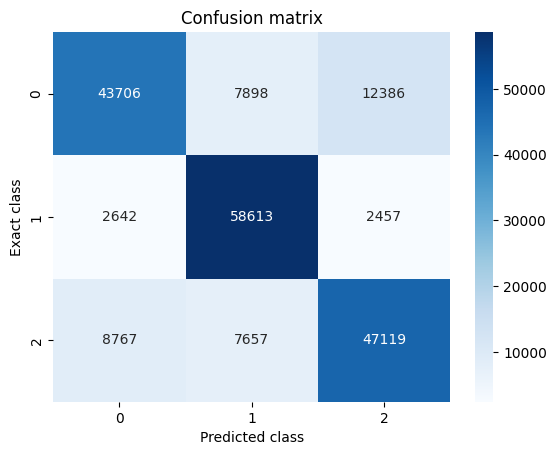

In [71]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [72]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.781395592041622

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73     63990
         1.0       0.79      0.92      0.85     63712
         2.0       0.76      0.74      0.75     63543

    accuracy                           0.78    191245
   macro avg       0.78      0.78      0.78    191245
weighted avg       0.78      0.78      0.78    191245

Specificity for class 0: 0.9103
Specificity for class 1: 0.8780
Specificity for class 2: 0.8838



Este modelo tiene un accuracy del 78.2% y un macro F1-score de 0.78, lo que refleja un rendimiento sólido y balanceado en las tres clases. La clase 1 destaca con un recall del 92% y F1 de 0.85, mientras que las clases 0 y 2 también obtienen resultados consistentes (F1 entre 0.74 y 0.75). Además, las specificities son altas (entre 87.6% y 90.8%), lo que indica un buen control de falsos positivos. En conjunto, este modelo es muy equilibrado y confiable, y se posiciona como uno de los mejores modelos evaluados hasta ahora.

# Modelo con base de datos sin atípicos

In [73]:
datos = pd.read_csv("/content/data/datos_sin_atipicos_balanceados.zip")
# Redondear al entero más cercano
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

In [74]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [75]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7777


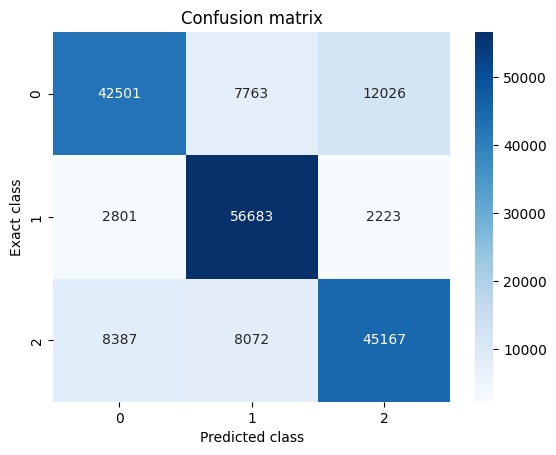

In [77]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [78]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7776568636429753

Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.68      0.73     62290
         1.0       0.78      0.92      0.84     61707
         2.0       0.76      0.73      0.75     61626

    accuracy                           0.78    185623
   macro avg       0.78      0.78      0.77    185623
weighted avg       0.78      0.78      0.77    185623

Specificity for class 0: 0.9093
Specificity for class 1: 0.8722
Specificity for class 2: 0.8851



Este modelo alcanza un accuracy del 77.7% y un macro F1-score de 0.77, lo que indica un rendimiento sólido y balanceado. La clase 1 destaca con un recall del 92% y F1-score de 0.84, mientras que las clases 0 y 2 mantienen buenos niveles de desempeño, con F1 entre 0.73 y 0.74. Las specificities, todas por encima del 87%, muestran que el modelo también evita bien los falsos positivos. En resumen, es un modelo confiable y equilibrado, aunque ligeramente por debajo del mejor modelo identificado, que logró un F1 más alto en todas las clases.

# Modelo con base de datos hasta 3 desviaciones estandar

In [79]:
datos = pd.read_csv("/content/data/datos_3dsv_balanceados.zip")
# Redondear al entero más cercano
columnas_a_redondear = ['presion_alterial_alta', 'colesterol_alto',
       'enfermedad_cardiaca', 'hace_ejercicio', 'come_fruta', 'come_vegetales',
       'edad', 'dificultad_caminar', 'genero', 'fuma', 'tipo']
datos[columnas_a_redondear] = datos[columnas_a_redondear].round()

In [80]:
X = datos.drop("tipo",axis=1)
y = datos['tipo']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [81]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [82]:
y_predict = model.predict(X_test)

The accuracy of Decision Tree is 0.7809


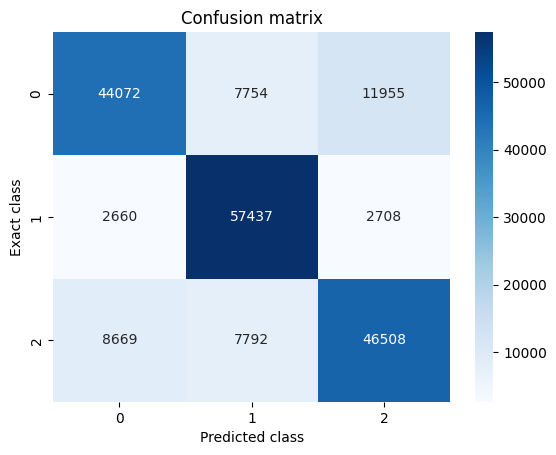

In [83]:
accuracy = accuracy_score(y_test,y_predict)
print('The accuracy of Decision Tree is {:.4f}'.format(accuracy))

confus_matrix = confusion_matrix(y_test,y_predict)
plt.title('Confusion matrix')
sns.heatmap(confus_matrix, annot=True, cmap='Blues', fmt='d')  # Formato entero
plt.xlabel('Predicted class')
plt.ylabel('Exact class');

serie = pd.Series(accuracy,index=['DecisionTreeClassifier'])
accuracy_DTmodel = pd.DataFrame({'accuracy':serie})

In [84]:
print("Accuracy:", accuracy_score(y_test, y_predict))
print("\nClassification Report:\n", classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
num_classes = cm.shape[0]

specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(specificity)
    print(f"Specificity for class {i}: {specificity:.4f}")
print()

Accuracy: 0.7808657117986864

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.69      0.74     63781
         1.0       0.79      0.91      0.85     62805
         2.0       0.76      0.74      0.75     62969

    accuracy                           0.78    189555
   macro avg       0.78      0.78      0.78    189555
weighted avg       0.78      0.78      0.78    189555

Specificity for class 0: 0.9099
Specificity for class 1: 0.8773
Specificity for class 2: 0.8842



Este modelo tiene un accuracy del 78.1% y un desempeño muy balanceado en todas las clases, con F1-scores de 0.74, 0.85 y 0.75 para las clases 0, 1 y 2 respectivamente. Destaca especialmente en la clase 1, con un recall del 92%, lo que indica una excelente capacidad para detectar la mayoría de sus casos. Además, mantiene specificities altas (entre 87% y 91%), lo que significa que evita correctamente los falsos positivos. En conjunto, este modelo logra precisión, cobertura y equilibrio, por lo tanto, es el mejor modelo hasta ahora en comparación con todos los anteriores según todas las métricas clave.

Aunque las métricas entre el modelo con datos hasta 3 desviaciones estándar y el modelo con la base completa son muy similares, el primero se consideró superior por ofrecer un mejor equilibrio entre precisión, recall y F1-score en todas las clases, así como una ligera ventaja en estabilidad y comportamiento frente a valores extremos. Además, al eliminar datos excesivamente atípicos, se redujo el ruido en el entrenamiento sin perder representatividad de los casos críticos.

En contraste, el modelo entrenado sin los valores atípicos mostró un rendimiento significativamente menor, lo que evidencia que estos datos, aunque extremos, aportaban valor predictivo al modelo.

Por lo tanto, se concluye que el modelo entrenado con la base hasta 3 desviaciones estándar fue el más robusto y equilibrado, siendo seleccionado como el mejor modelo en esta etapa.

In [87]:
#Para proba el modelo
#'pres', 'col', 'imc','enf_car', 'h_ejerc''fruta''come_vegets','edad', 'dificultad_caminar', 'genero', 'fuma'
nuevo_dato = [[1,1,33,0,0,0,1,7,0,1,0]]  # ejemplo

# Predecir clase
prediccion = model.predict(nuevo_dato)
print("Clase predicha:", prediccion[0])
if(prediccion == 0):
  print("posiblemente no es diabético")
elif(prediccion == 1):
  print("Posiblemente es prediabético")
else:
  print("Posiblemente es diabético")


Clase predicha: 1.0
Posiblemente es prediabético


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
joblib.dump(model, 'modelo_entrenado.pkl') #descagar .pkl del modelo
#se guarda el que es hasta 3 desviaciones porque fue el último que se corrio

In [ ]:
joblib.dump(X.columns.tolist(), 'columnas_modelo.pkl') #descargar .pkl de las variables independientes

# Conclusiones:

Aunque el ámbito médico cuenta con gran cantidad de información, muchas veces esta no es suficiente para entrenar modelos de forma óptima, especialmente cuando se trabaja únicamente con variables categóricas. Esto limita la selección de variables relevantes y afecta el rendimiento del modelo.

La mayoría de los datos originales pertenecen a personas sin diabetes, lo que causó que los modelos entrenados sin balanceo se sesgaran. Estos modelos mostraban una alta precisión general (accuracy), pero fallaban gravemente al predecir casos de prediabetes y diabetes. Por eso, aplicar técnicas de balanceo fue clave en la etapa de preparación de datos.

A pesar de las limitaciones en los datos y la complejidad del problema, el modelo logró un desempeño sólido, alcanzando un accuracy cercano al 78%. Esto demuestra su capacidad para identificar con buena precisión a personas en riesgo de diabetes. Sin embargo, aún hay margen de mejora, especialmente en la predicción de casos menos frecuentes como la prediabetes. Optimizar la selección de variables, explorar nuevos algoritmos y enriquecer el dataset con más información clínica podrían llevar a un modelo más preciso, equitativo y útil en escenarios reales.


# Siguientes pasos

Tras haber construido y evaluado el modelo, el siguiente nivel en el desarrollo consiste en expandir la base de datos utilizada, incorporando nuevos registros y variables clínicas relevantes que no estaban disponibles inicialmente, como historial familiar, niveles de glucosa o actividad física. Asimismo, se podrían buscar y combinar otros datasets relacionados con diabetes para aumentar la diversidad y representatividad de los datos, lo que permitiría mejorar la capacidad de generalización del modelo.

Otra línea de trabajo importante sería reentrenar y ajustar el modelo con los nuevos datos, evaluar su rendimiento en diferentes segmentos de la población y eventualmente integrarlo en una aplicación práctica, como un sistema de alerta temprana o una herramienta de apoyo para profesionales de la salud. Estas mejoras podrían llevar el modelo desde un análisis exploratorio académico hacia un sistema real con impacto clínico y social.

# **“La inteligencia artificial no reemplazará a los médicos, pero los médicos** **que la usen reemplazarán a los que no lo hagan.”**
— Eric Topol